In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'matplotlib'

In [3]:
!pip install matplotlib



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 5.1 MB/s eta 0:00:000:00:01m eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 7.0 MB/s eta 0:00:007.5 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 6.1 MB/s eta 0:00:00 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 5.9 MB/s eta 0:00:00 MB/s eta 0:00:01:01


In [5]:
df=pd.read_csv('/home/legend/ids_project/Simple-House-Price-Prediction-using-Machine-Learning/House-Price-Prediction-using-Machine-Learning-main/data/Bengaluru_House_Data.csv')
df.sample(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
12602,Super built-up Area,Ready To Move,Lake City,1 BHK,Prdenth,600,1.0,1.0,22.8
11577,Plot Area,Ready To Move,Varsova Layout,6 Bedroom,NaN,7000,6.0,2.0,560.0
12766,Super built-up Area,Ready To Move,Electronic City,3 BHK,Goty E,1575,3.0,1.0,94.5
11109,Super built-up Area,18-Jul,Rajaji Nagar,2 BHK,ProdsWe,1376,2.0,1.0,124.0
209,Plot Area,Ready To Move,Padmanabhanagar,4 Bedroom,NaN,1736,6.0,0.0,190.0


In [6]:
df.shape

(13320, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [8]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [9]:
for column in df.columns:
    print('Column:',column)
    print(df[column].value_counts())
    print('\n\n\n')

Column: area_type
area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64




Column: availability
availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
16-Oct               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: count, Length: 81, dtype: int64




Column: location
location
Whitefield                         540
Sarjapur  Road                     399
Electronic City                    302
Kanakpura Road                     273
Thanisandra                        234
                                  ... 
3rd Stage Raja Rajeshwari Nagar      1
Chuchangatta Colony                  1
Electronic City Phase 1,             1
Chikbasavanapura                     1
Abshot Layout                        1
Name: count, Length: 1305, dtype: int64




### Unique values in every Column

In [10]:
for column in df.columns:
    print('Column:',column)
    print(df[column].nunique())


Column: area_type
4
Column: availability
81
Column: location
1305
Column: size
31
Column: society
2688
Column: total_sqft
2117
Column: bath
19
Column: balcony
4
Column: price
1994


<Axes: ylabel='count'>

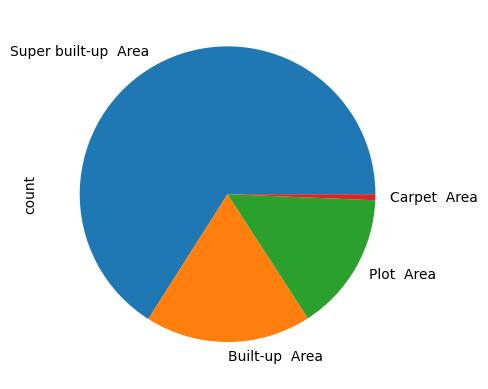

In [11]:
df['area_type'].value_counts().plot(kind='pie')

<Axes: xlabel='availability'>

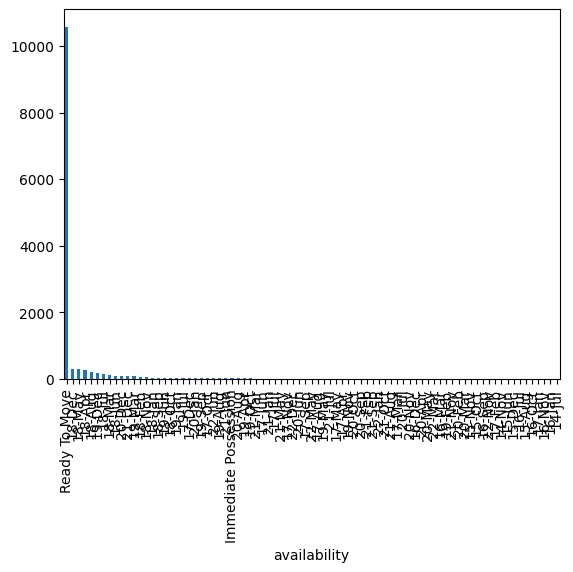

In [12]:
df['availability'].value_counts().plot(kind='bar')

NameError: name 'plt' is not defined

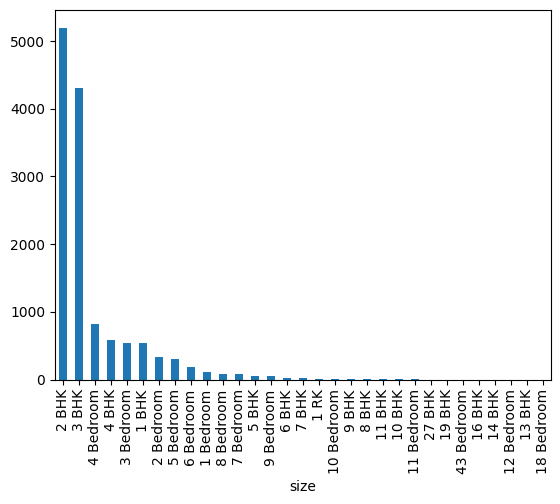

In [13]:
df['size'].value_counts().plot(kind='bar')
plt.title('Size Distribution')
plt.plot()

NameError: name 'plt' is not defined

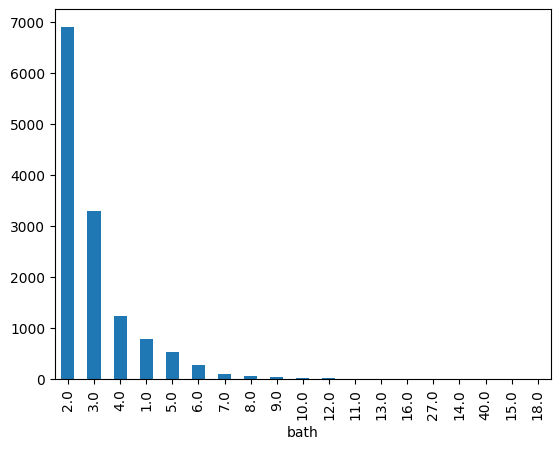

In [14]:
df['bath'].value_counts().plot(kind='bar')
plt.title('Bathrooms Distribution')
plt.plot()

NameError: name 'plt' is not defined

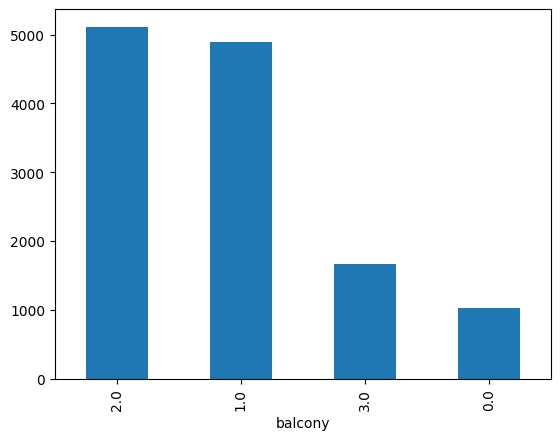

In [15]:
df['balcony'].value_counts().plot(kind='bar')
plt.title('Balcony Distribution')
plt.plot()

In [22]:
columns_to_drop = ['area_type', 'availability', 'balcony', 'society']
df.drop(columns=[col for col in columns_to_drop if col in df.columns], inplace=True)
df


,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [23]:
df.describe()

,bath,price
count,13247.000000,13320.000000
mean,2.692610,112.565627
std,1.341458,148.971674
min,1.000000,8.000000
25%,2.000000,50.000000
50%,2.000000,72.000000
75%,3.000000,120.000000
max,40.000000,3600.000000


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [25]:
df['location'].value_counts()

location
Whitefield                         540
Sarjapur  Road                     399
Electronic City                    302
Kanakpura Road                     273
Thanisandra                        234
                                  ... 
3rd Stage Raja Rajeshwari Nagar      1
Chuchangatta Colony                  1
Electronic City Phase 1,             1
Chikbasavanapura                     1
Abshot Layout                        1
Name: count, Length: 1305, dtype: int64

In [27]:
df['location']=df['location'].fillna('Whitefield')

In [28]:
df['size'].value_counts()

size
2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
10 BHK           2
11 Bedroom       2
27 BHK           1
19 BHK           1
43 Bedroom       1
16 BHK           1
14 BHK           1
12 Bedroom       1
13 BHK           1
18 Bedroom       1
Name: count, dtype: int64

In [29]:
df['size']=df['size'].fillna('2 BHK')

In [30]:
df['bath']=df['bath'].fillna(df['bath'].median())

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13320 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13320 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [32]:
df['bhk']=df['size'].str.split().str.get(0).astype(int)

In [33]:
df.drop(columns=['size'],inplace=True)

In [34]:
df[df['bhk']>5]

,location,total_sqft,bath,price,bhk
9,Gandhi Bazar,1020,6.0,370.0,6
45,HSR Layout,600,9.0,200.0,8
58,Murugeshpalya,1407,4.0,150.0,6
64,Bommanahalli,3000,8.0,140.0,8
68,Devarachikkanahalli,1350,7.0,85.0,8
...,...,...,...,...,...
13221,T Dasarahalli,1178,9.0,75.0,9
13226,Raja Rajeshwari Nagar,6000,8.0,215.0,8
13277,Kundalahalli Colony,1400,7.0,218.0,7
13279,Vishwanatha Nagenahalli,1200,5.0,130.0,6


In [35]:
df.describe()

,bath,price,bhk
count,13320.000000,13320.000000,13320.000000
mean,2.688814,112.565627,2.802778
std,1.338754,148.971674,1.294496
min,1.000000,8.000000,1.000000
25%,2.000000,50.000000,2.000000
50%,2.000000,72.000000,3.000000
75%,3.000000,120.000000,3.000000
max,40.000000,3600.000000,43.000000


### Removing outliers

In [36]:
df=df[df['bhk']<6]

In [37]:
df.shape

(12830, 5)

In [38]:
df.describe()

,bath,price,bhk
count,12830.000000,12830.000000,12830.000000
mean,2.532970,107.781149,2.631567
std,0.959608,138.034123,0.849930
min,1.000000,8.000000,1.000000
25%,2.000000,49.000000,2.000000
50%,2.000000,70.000000,3.000000
75%,3.000000,115.000000,3.000000
max,8.000000,2912.000000,5.000000


In [39]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      shape=(2085,), dtype=object)

In [40]:
def rangeToValue(x):
    temp=x.split('-')
    if len(temp)==2:
        return (float(temp[0]) + float(temp[1]))/2  
    try:
        return float(x)
    except:
        return None


In [41]:
df['total_sqft']=df['total_sqft'].apply(rangeToValue)

/tmp/ipykernel_86508/1664292882.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_sqft']=df['total_sqft'].apply(rangeToValue)


In [42]:
df['total_sqft'].info()

<class 'pandas.core.series.Series'>
Index: 12830 entries, 0 to 13319
Series name: total_sqft
Non-Null Count  Dtype  
--------------  -----  
12788 non-null  float64
dtypes: float64(1)
memory usage: 200.5 KB


In [ ]:
df

In [ ]:
df['price_per_sqft']=df['price']*100000 / df['total_sqft']

In [ ]:
df['location'].value_counts()[df['location'].value_counts()>50]

In [ ]:
location_count=df['location'].value_counts()[df['location'].value_counts()>50]
location_count

In [ ]:
df['location']=df['location'].apply(lambda x: 'other' if x not in location_count else x )

In [ ]:
df['location'].nunique()

In [ ]:
df.describe()

In [ ]:
(df['total_sqft']/df['bhk']).describe()

In [ ]:
df=df[(df['total_sqft']/df['bhk'])>=300]

In [ ]:
df.describe()

In [ ]:
df['price_per_sqft'].plot(kind='kde')

In [ ]:
def remove_outliers_sqft(df):
    df_output = pd.DataFrame()
    for key, subdf in df.groupby( 'location'):
        m= np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        gen_df=subdf[(subdf.price_per_sqft >(m-st)) & (subdf.price_per_sqft< (m+st))]
        df_output=pd.concat([df_output,gen_df],ignore_index=True)
    return df_output
df=remove_outliers_sqft(df)
df['price_per_sqft'].plot(kind='kde')
df.describe()

In [ ]:
df

In [ ]:
df.drop(columns=['price_per_sqft'],inplace=True)

In [ ]:
df['bath']=df['bath'].astype(int)
df

In [ ]:
df['location'].value_counts().plot(kind='bar')
plt.title('Location Distribution')
plt.plot()

In [ ]:
df['bhk'].plot(kind='kde')
plt.title('Distribution of bhk')
plt.plot()

In [ ]:
df['bath'].plot(kind='kde')
plt.title('Distribution of Bathroom')
plt.plot()

In [ ]:
df['total_sqft'].plot(kind='kde')
plt.title('Distribution of Total Square Foot')
plt.plot()

In [ ]:
df['price'].value_counts().plot(kind='kde')
plt.title('Distribution of Price')
plt.plot()

In [ ]:
df.to_csv('home/legend/temp/data/Bengaluru_House_Data.csv')

In [ ]:
X=df.drop(columns=['price'])
y=df['price']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso,Ridge
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.compose import make_column_transformer

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [ ]:
print(X_train.shape)
print(X_test.shape)

### Applying Linear Regression

In [ ]:
column_transform=make_column_transformer((OneHotEncoder(sparse=False),['location']),remainder='passthrough')

In [ ]:
scaler=StandardScaler()

In [ ]:
lr=LinearRegression()

In [ ]:
pipe_lr=make_pipeline(column_transform,scaler,lr) # data goes to column_transformer ---> scaler ---> linear_regression

In [ ]:
pipe_lr.fit(X_train,y_train)

In [ ]:
y_pred_lr=pipe_lr.predict(X_test)

In [ ]:
r2_score(y_test,y_pred_lr)

### Applying Lasso Regression

In [ ]:
lasso=Lasso()

In [ ]:
pipe_lasso=make_pipeline(column_transform,scaler,lasso) # data goes to column_transformer ---> scaler ---> linear_regression

In [ ]:
pipe_lasso.fit(X_train,y_train)

In [ ]:
y_pred_lasso=pipe_lasso.predict(X_test)

In [ ]:
r2_score(y_test,y_pred_lasso)

### Applying Ridge Regression

In [ ]:
ridge=Ridge()

In [ ]:
pipe_ridge=make_pipeline(column_transform,scaler,lasso) # data goes to column_transformer ---> scaler ---> linear_regression

In [ ]:
pipe_ridge.fit(X_train,y_train)

In [ ]:
y_pred_ridge=pipe_lasso.predict(X_test)

In [ ]:
r2_score(y_test,y_pred_ridge)

In [ ]:
print('LinearRegression',r2_score(y_test,y_pred_lr))
print('Lasso',r2_score(y_test,y_pred_lasso))
print('Ridge',r2_score(y_test,y_pred_ridge))

#### So Linear Regression gives the best results , Hence we take it as our final Model

In [ ]:
import pickle
pickle.dump(pipe_lr,open(r'C:\Users\harsh\Desktop\House Price Prediction\models\LRModel.pkl','wb'))